Practical 2:Multi-variant Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D


In [66]:

data = np.loadtxt('age_price.txt', delimiter=',')
data

array([[ 7.,  4.,  9.],
       [ 5.,  3.,  7.],
       [ 3.,  4., 10.],
       [ 2.,  6., 18.],
       [ 1.,  2.,  6.]])

In [67]:
X_train = data[:,[0,1]] #feature set
y_train = data[:,2] #label set
data.shape


(5, 3)

In [68]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [69]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y_train))
    theta = theta.reshape(1,n+1)
    return theta, cost


In [70]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [51]:
#x = df[['x1','x2']] 
#y = df['y']

In [79]:
#learning rate=0.001 and num_iterations=1000
theta, cost = linear_regression(X_train,y_train,0.001,1000)

In [80]:
theta

array([[ 0.42795944,  0.42795944, -0.48266713,  2.87311221]])

Text(0, 0.5, 'Cost')

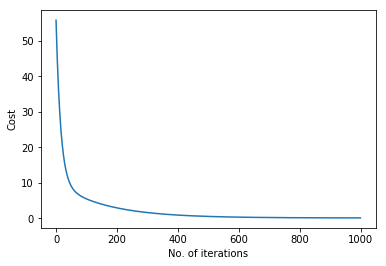

In [81]:
cost = list(cost)
n_iterations = [x for x in range(0,1000)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')



Text(0.5, 0, 'Actual Price of House')

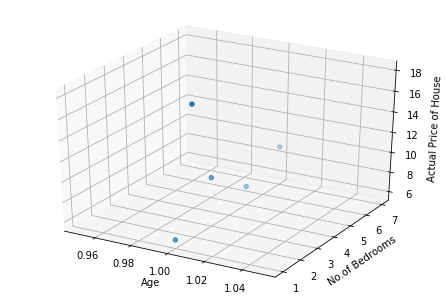

In [82]:
x_value = list(X_train.transpose()[0])
y_value = list(X_train.transpose()[1])
z_value = list(y_train)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_value, y_value,
           z_value)
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('No.of Bedrooms', fontsize=10)
ax.set_zlabel('Actual Price of House', fontsize=10)


Text(0.5, 0, 'Actual Price of House')

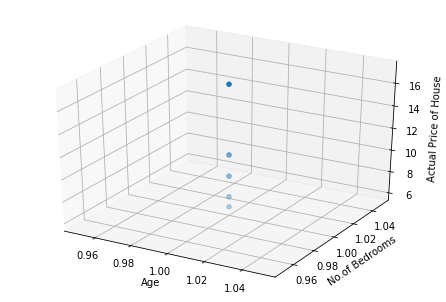

In [83]:
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train)
                         ,axis = 1)
predictions = hypothesis(theta, X_train, X_train.shape[1] - 1)
x_value = list(X_train.transpose()[0])
y_value = list(X_train.transpose()[1])
z_value = list(predictions)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_value, y_value,
           z_value)
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('No.of Bedrooms', fontsize=10)
ax.set_zlabel('Actual Price of House', fontsize=10)
